In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl        # 시각화도구(시각화옵션, 폰트설정)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler


stg = pd.read_csv("./data/a_steam_data_2021_2025.csv")
plt.rcParams['font.family'] = 'Malgun Gothic'  # 맑은 고딕
plt.rcParams['axes.unicode_minus'] = False     # 마이너스 깨짐 방지

In [2]:
stg.head()

,appid,name,release_year,release_date,genres,categories,price,recommendations,developer,publisher
0,3057270,Seafarer's Gambit,2024,"Jul 5, 2024",Action;Adventure;Indie;RPG;Strategy,Single-player;Family Sharing,3.99,0,Bouncy Rocket Studios,Bouncy Rocket Studios
1,3822840,Capitalist Misadventures,2025,"Jul 25, 2025",Casual;Indie;Simulation;Strategy,Single-player;Save Anytime;Family Sharing,7.99,0,Caramelo Studios,Caramelo Studios
2,3216640,The Beast and the Princess,2025,"Jun 17, 2025",Adventure;Indie;Strategy,Single-player;Steam Achievements;Full controll...,12.99,0,Libragames,Libragames
3,2403620,Air Twister,2023,"Nov 10, 2023",Action;Adventure;Indie,Single-player;Steam Achievements;Full controll...,24.99,0,YS Net,ININ
4,1538040,Horde Slayer,2021,"Mar 19, 2021",Action;Adventure;Casual;Indie;RPG;Early Access,Single-player;Steam Achievements;Full controll...,3.99,0,Wagner Rodrigues,Wagner Rodrigues


In [3]:
stg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65521 entries, 0 to 65520
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   appid            65521 non-null  int64  
 1   name             65521 non-null  object 
 2   release_year     65521 non-null  int64  
 3   release_date     65521 non-null  object 
 4   genres           65455 non-null  object 
 5   categories       65514 non-null  object 
 6   price            65521 non-null  float64
 7   recommendations  65521 non-null  int64  
 8   developer        65468 non-null  object 
 9   publisher        65338 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 5.0+ MB


In [4]:
stg.columns

Index(['appid', 'name', 'release_year', 'release_date', 'genres', 'categories',
       'price', 'recommendations', 'developer', 'publisher'],
      dtype='object')

In [5]:
stg.describe()

,appid,release_year,price,recommendations
count,6.552100e+04,65521.000000,65521.000000,65521.000000
mean,2.580607e+06,2023.453091,7.204043,362.165336
std,7.692480e+05,1.386641,16.914429,6936.837198
min,1.200220e+06,2021.000000,0.000000,0.000000
25%,1.916970e+06,2022.000000,0.990000,0.000000
50%,2.516050e+06,2024.000000,3.990000,0.000000
75%,3.193800e+06,2025.000000,9.740000,0.000000
max,4.243930e+06,2025.000000,1900.000000,862487.000000


In [6]:
stg.isnull().sum()

appid                0
name                 0
release_year         0
release_date         0
genres              66
categories           7
price                0
recommendations      0
developer           53
publisher          183
dtype: int64

퍼블리셔와 장르, 개발사에서 결측치가 꽤 나왔다.<br>
데이터가 60000개는 넘으니 결측치가 나오는 데이터는 제거하기로 했다.

In [7]:
stg = stg.dropna()

stg.isnull().sum()

appid              0
name               0
release_year       0
release_date       0
genres             0
categories         0
price              0
recommendations    0
developer          0
publisher          0
dtype: int64

In [8]:
# ;로 구분되는 것을 제거하여 리스트로 담기
stg.describe()

stg['genre_list'] = stg['genres'].str.split(';').apply(
    lambda x: [g.strip() for g in x]
)

stg['category_list'] = stg['categories'].str.split(';').apply(
    lambda x: [s.strip() for s in x]
)

stg

,appid,name,release_year,release_date,genres,categories,price,recommendations,developer,publisher,genre_list,category_list
0,3057270,Seafarer's Gambit,2024,"Jul 5, 2024",Action;Adventure;Indie;RPG;Strategy,Single-player;Family Sharing,3.99,0,Bouncy Rocket Studios,Bouncy Rocket Studios,"[Action, Adventure, Indie, RPG, Strategy]","[Single-player, Family Sharing]"
1,3822840,Capitalist Misadventures,2025,"Jul 25, 2025",Casual;Indie;Simulation;Strategy,Single-player;Save Anytime;Family Sharing,7.99,0,Caramelo Studios,Caramelo Studios,"[Casual, Indie, Simulation, Strategy]","[Single-player, Save Anytime, Family Sharing]"
2,3216640,The Beast and the Princess,2025,"Jun 17, 2025",Adventure;Indie;Strategy,Single-player;Steam Achievements;Full controll...,12.99,0,Libragames,Libragames,"[Adventure, Indie, Strategy]","[Single-player, Steam Achievements, Full contr..."
3,2403620,Air Twister,2023,"Nov 10, 2023",Action;Adventure;Indie,Single-player;Steam Achievements;Full controll...,24.99,0,YS Net,ININ,"[Action, Adventure, Indie]","[Single-player, Steam Achievements, Full contr..."
4,1538040,Horde Slayer,2021,"Mar 19, 2021",Action;Adventure;Casual;Indie;RPG;Early Access,Single-player;Steam Achievements;Full controll...,3.99,0,Wagner Rodrigues,Wagner Rodrigues,"[Action, Adventure, Casual, Indie, RPG, Early ...","[Single-player, Steam Achievements, Full contr..."
...,...,...,...,...,...,...,...,...,...,...,...,...
65516,3097010,X Simulator Drone,2024,"Jul 31, 2024",Casual;Indie;Simulation,Single-player;Family Sharing,14.99,0,Inonia Games,Inonia Games,"[Casual, Indie, Simulation]","[Single-player, Family Sharing]"
65517,3304930,Retro Dungeon Slayer,2025,"Mar 3, 2025",Action;Indie;Early Access,Single-player;Family Sharing,4.99,0,Hard Shark Games,Hard Shark Games,"[Action, Indie, Early Access]","[Single-player, Family Sharing]"
65518,1461580,Molecule Builder,2021,"Feb 4, 2021",Simulation;Education,Single-player;Tracked Controller Support;VR On...,14.99,0,Xennial Digital,Xennial Digital,"[Simulation, Education]","[Single-player, Tracked Controller Support, VR..."
65519,1379120,MechNest,2024,"Apr 13, 2024",Action;Indie,Single-player;Partial Controller Support;Famil...,15.99,0,PoisonGames,PoisonGames,"[Action, Indie]","[Single-player, Partial Controller Support, Fa..."


<Axes: xlabel='price'>

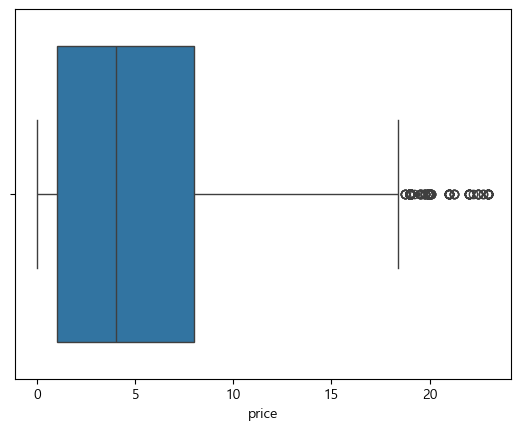

In [9]:
# 이상치 제거
Q1 = stg['price'].quantile(0.25)
Q3 = stg['price'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

stg = stg[(stg['price'] >= lower) & (stg['price'] <= upper)]

sns.boxplot(x=stg['price'])

In [10]:
# Free To Play', 'Early Access' 장르 삭제
stg['genre_list'].explode().value_counts()

remove_genres = ['Free To Play', 'Early Access']

stg['genre_list'] = stg['genre_list'].apply(
    lambda x: [g for g in x if g not in remove_genres]
)
stg['genre_list'].explode().value_counts()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_16932\3658775952.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stg['genre_list'] = stg['genre_list'].apply(


genre_list
Indie                    44811
Casual                   29771
Adventure                25141
Action                   24448
Simulation               13584
Strategy                 12306
RPG                      11833
Sports                    2257
Racing                    2106
Massively Multiplayer     1329
Game Development            20
Utilities                   17
Education                   15
Animation & Modeling        12
Design & Illustration       12
Software Training           10
Video Production             4
Accounting                   3
Audio Production             3
Web Publishing               1
Name: count, dtype: int64

In [11]:
# 필요한 장르만 남기기
keep_genres = [
    'Indie', 'Casual', 'Adventure', 'Action',
    'Simulation', 'Strategy', 'RPG',
    'Sports', 'Racing'
]

stg['genre_list'] = stg['genre_list'].apply(
    lambda x: [g for g in x if g in keep_genres]
)

stg = stg[stg['genre_list'].apply(len) > 0]

stg['genre_list'].explode().value_counts()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_16932\2087073861.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stg['genre_list'] = stg['genre_list'].apply(


genre_list
Indie         44811
Casual        29771
Adventure     25141
Action        24448
Simulation    13584
Strategy      12306
RPG           11833
Sports         2257
Racing         2106
Name: count, dtype: int64

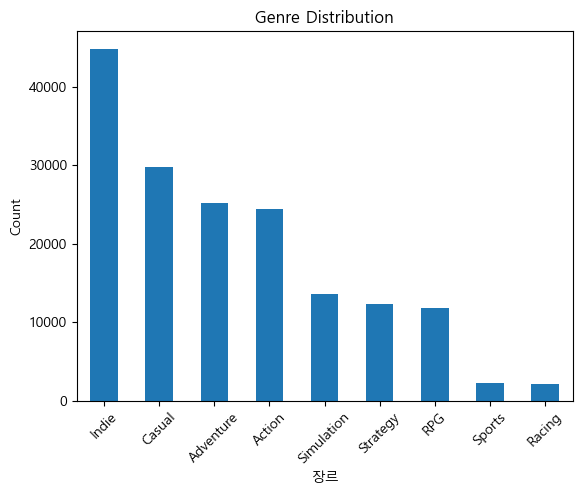

In [12]:
genre_counts = stg['genre_list'].explode().value_counts()

plt.figure()
genre_counts.plot(kind='bar')
plt.title('Genre Distribution')
plt.xlabel('장르')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

인디게임이 압도적으로 많음을 알 수 있음
- 겹치는 장르도 꽤 많음. 딱 이 장르다 라고 분류하기가 어려움
- 실험용게임을 만드는 개발자도 상당수

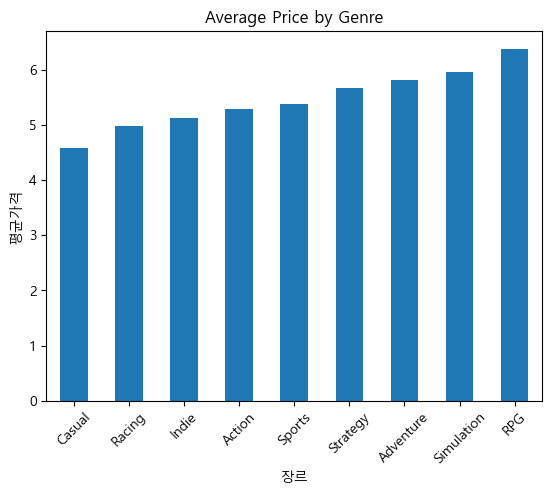

In [13]:
genre_price = (
    stg.explode('genre_list').groupby('genre_list')['price'].mean()
.sort_values()
)

plt.figure()
genre_price.plot(kind='bar')
plt.title('Average Price by Genre')
plt.xlabel('장르')
plt.ylabel('평균가격')
plt.xticks(rotation=45)
plt.show()

Indie게임이 0원짜리 게임도 많음에불구하고 의외로 가격이 꽤 나간다.
- 스팀에서 장르는 개발사가 붙이기 나름
- 가끔 AAA급 게임도 Indie로 분류되는 경우가 있음

In [14]:
stg.sort_values('recommendations', ascending=False)[
    ['name', 'genre_list', 'price', 'recommendations']
].head(20)

,name,genre_list,price,recommendations
47520,Call of Duty®,[Action],0.00,402294
36937,Lethal Company,"[Action, Adventure, Indie]",9.99,401836
36391,Palworld,"[Action, Adventure, Indie, RPG]",22.49,342592
22559,R.E.P.O.,[Action],9.99,265041
24424,Vampire Survivors,"[Action, Casual, Indie, RPG]",4.99,244333
21173,Schedule I,"[Action, Indie, Simulation, Strategy]",19.99,239325
44312,PEAK,"[Action, Adventure, Indie]",7.99,208692
45554,NARAKA: BLADEPOINT,"[Action, Adventure]",0.00,197307
8025,It Takes Two Friend's Pass,"[Action, Adventure, Indie]",0.00,195833
53311,鬼谷八荒 Tale of Immortal,"[Action, Adventure, Indie, RPG, Simulation]",19.99,191648


In [15]:
# explode 후 피벗
stg_exploded = stg.explode('genre_list')

pivot_table = stg.explode('genre_list').pivot_table(
    index = 'name',
    columns='genre_list',
    values='recommendations',
    fill_value=0
)
pivot_table


genre_list,Action,Adventure,Casual,Indie,RPG,Racing,Simulation,Sports,Strategy
name,,,,,,,,,
Bridge Orders - Outrim: The Unseen Enemy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doppelganger,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Douchebag: Ultimate Bro Pack,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dreaming on the last light 人偶馆绮幻夜,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fear Night Tales - Brothers Kebab Saloon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
👑Idle Calibur：Zero💕（选王之剑：零）,0.0,0.0,0.0,431.0,431.0,0.0,431.0,0.0,431.0
👑万千网友共修仙👑,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
📷🔍 Pictective,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
def top_games_by_genre(genre, top_n=10):
    if genre not in pivot_table.columns:
        return f"{genre} 장르 없음"
    
    # 장르 추천수 기준 정렬
    sorted_games = pivot_table[genre].sort_values(ascending=False).head(top_n)
    
    # 실제 정보 출력 (price 포함)
    return stg.loc[stg['name'].isin(sorted_games.index)] \
            .sort_values('recommendations', ascending=False) \
            [['name','price','recommendations']]
top_games_by_genre('RPG', top_n=5)

,name,price,recommendations
36391,Palworld,22.49,342592
24424,Vampire Survivors,4.99,244333
53311,鬼谷八荒 Tale of Immortal,19.99,191648
26051,DAVE THE DIVER,19.99,126127
59045,MiSide,14.99,113366


장르가 여러개인 게임들은 최상위에 나오는 값으로 정했다.
- 예시 : genre_list = ['Action', 'RPG'], recommendations=5000<br>
  genre = 'Action'

In [17]:
top_n = 5  # 상위 5개 

genre_list = pivot_table.columns.tolist()  # 피벗화시킨 장르 목록
top_games_all = []

for genre in genre_list:
    # 장르 기준 추천수 정렬
    sorted_games = pivot_table[genre].sort_values(ascending=False).head(top_n)
    
    # 실제 정보 가져오기
    top_games = stg.loc[stg['name'].isin(sorted_games.index), ['name','price','recommendations']]
    top_games = top_games.copy()
    top_games['genre'] = genre  # 장르 컬럼 추가
    
    top_games_all.append(top_games)

# 하나의 DataFrame으로 합치기
top_games_df = pd.concat(top_games_all).reset_index(drop=True)
top_games_df

,name,price,recommendations,genre
0,R.E.P.O.,9.99,265041,Action
1,Vampire Survivors,4.99,244333,Action
2,Palworld,22.49,342592,Action
3,Lethal Company,9.99,401836,Action
4,Call of Duty®,0.00,402294,Action
5,It Takes Two Friend's Pass,0.00,195833,Adventure
6,Palworld,22.49,342592,Adventure
7,Lethal Company,9.99,401836,Adventure
8,PEAK,7.99,208692,Adventure
9,NARAKA: BLADEPOINT,0.00,197307,Adventure


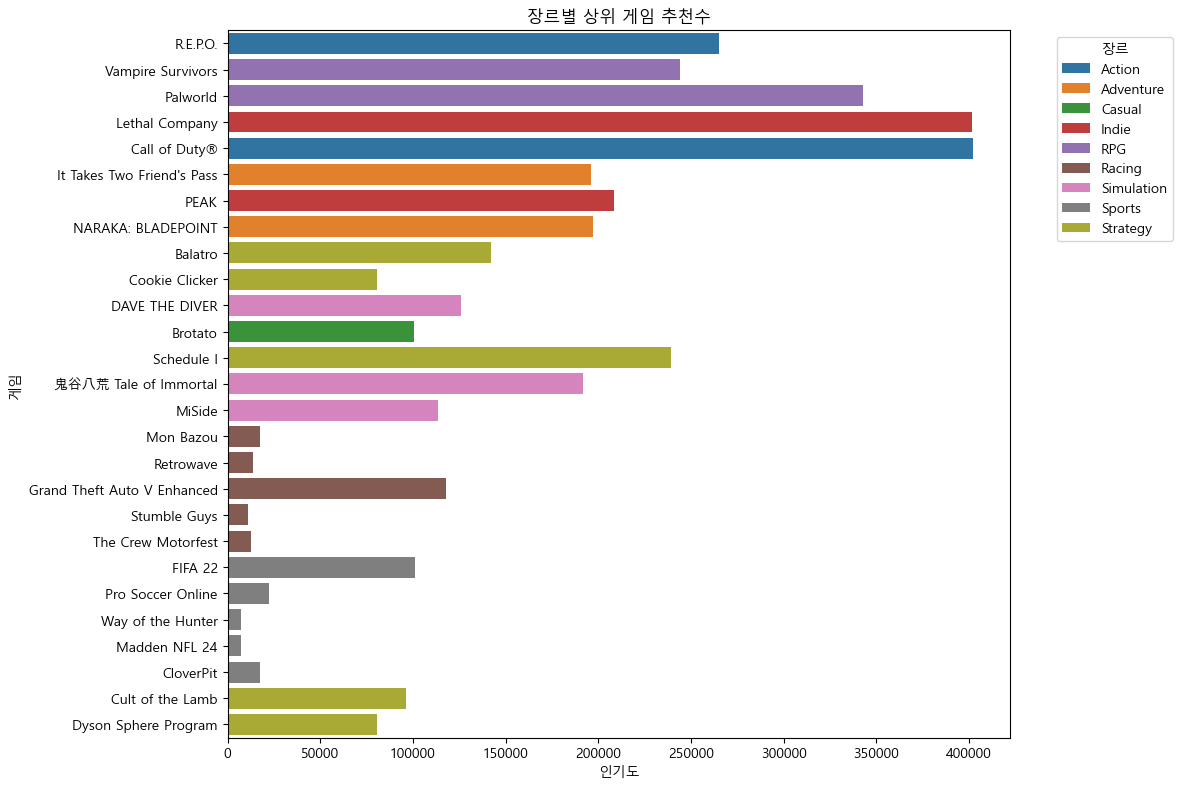

In [18]:
plt.figure(figsize=(12,8))
sns.barplot(
    data=top_games_df,
    x='recommendations',
    y='name',
    hue='genre',
    dodge=False
)
plt.title('장르별 상위 게임 추천수')
plt.xlabel('인기도')
plt.ylabel('게임')
plt.legend(title='장르', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

검색한 게임 비슷한 장르 추천하도록 점수를 부여(검색 : search_games('Palworld', top_n=5))

In [19]:
# 메모리부족으로 인기도 기준 상위 3만개만 추출
top_stg = stg.sort_values('recommendations', ascending=False).head(30000)

mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(top_stg['genre_list'])
genre_df = pd.DataFrame(genre_encoded, columns=mlb.classes_, index=top_stg['name'])
genre_df 


,Action,Adventure,Casual,Indie,RPG,Racing,Simulation,Sports,Strategy
name,,,,,,,,,
Call of Duty®,1,0,0,0,0,0,0,0,0
Lethal Company,1,1,0,1,0,0,0,0,0
Palworld,1,1,0,1,1,0,0,0,0
R.E.P.O.,1,0,0,0,0,0,0,0,0
Vampire Survivors,1,0,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
Fury of West,1,0,1,1,0,0,0,0,1
The Little Moon,1,1,1,1,0,0,0,0,0
Damn it!,1,1,1,1,0,0,0,0,0


검색한 게임의 장르에서 인기도가 비슷한 게임을 추천하도록 벡터화

In [20]:
scaler = MinMaxScaler()
stg_scaled = pd.DataFrame(
    scaler.fit_transform(top_stg[['recommendations']]),
    columns=['recommendations'],
    index=top_stg['name']
)

feature_df = pd.concat([genre_df, stg_scaled], axis=1)
feature_df

,Action,Adventure,Casual,Indie,RPG,Racing,Simulation,Sports,Strategy,recommendations
name,,,,,,,,,,
Call of Duty®,1,0,0,0,0,0,0,0,0,1.000000
Lethal Company,1,1,0,1,0,0,0,0,0,0.998862
Palworld,1,1,0,1,1,0,0,0,0,0.851596
R.E.P.O.,1,0,0,0,0,0,0,0,0,0.658824
Vampire Survivors,1,0,1,1,1,0,0,0,0,0.607349
...,...,...,...,...,...,...,...,...,...,...
Fury of West,1,0,1,1,0,0,0,0,1,0.000000
The Little Moon,1,1,1,1,0,0,0,0,0,0.000000
Damn it!,1,1,1,1,0,0,0,0,0,0.000000


검색한 게임과 비슷한 장르 중에서 인기도를 코사인계산

In [21]:
sim_matrix = cosine_similarity(feature_df)
sim_df = pd.DataFrame(sim_matrix, index=top_stg['name'], columns=top_stg['name'])
sim_df

name,Call of Duty®,Lethal Company,Palworld,R.E.P.O.,Vampire Survivors,Schedule I,PEAK,NARAKA: BLADEPOINT,It Takes Two Friend's Pass,鬼谷八荒 Tale of Immortal,...,Inverse Evolver,Human Defense [RTS],Plushie Dungeon,Web Crawlies {Multiplayer},Street Racer,Fury of West,The Little Moon,Damn it!,Antikiller,gold scrapping simulator
name,,,,,,,,,,,,,,,,,,,,,
Call of Duty®,1.000000,0.706905,0.602310,0.979497,0.543764,0.540479,0.593961,0.704088,0.584340,0.456627,...,0.408248,0.000000,0.000000,0.000000,0.500000,0.353553,0.353553,0.353553,0.500000,0.000000
Lethal Company,0.706905,1.000000,0.885960,0.692493,0.623725,0.621815,0.973184,0.831951,0.969129,0.760379,...,0.866272,0.250071,0.447341,0.500142,0.353654,0.500142,0.750213,0.750213,0.707308,0.353654
Palworld,0.602310,0.885960,1.000000,0.599687,0.774112,0.552634,0.875702,0.743035,0.873079,0.886501,...,0.796801,0.230017,0.617199,0.460033,0.325293,0.460033,0.690050,0.690050,0.650585,0.325293
R.E.P.O.,0.979497,0.692493,0.599687,1.000000,0.559376,0.557054,0.619699,0.738145,0.612994,0.479890,...,0.482122,0.000000,0.000000,0.000000,0.590477,0.417530,0.417530,0.417530,0.590477,0.000000
Vampire Survivors,0.543764,0.623725,0.774112,0.559376,1.000000,0.541414,0.612582,0.414832,0.610453,0.688334,...,0.552439,0.478427,0.427918,0.478427,0.338299,0.717640,0.717640,0.717640,0.338299,0.338299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Fury of West,0.353553,0.500142,0.460033,0.417530,0.717640,0.718872,0.553077,0.334036,0.555816,0.437397,...,0.577350,0.750000,0.447214,0.500000,0.353553,1.000000,0.750000,0.750000,0.353553,0.353553
The Little Moon,0.353553,0.750213,0.690050,0.417530,0.717640,0.479248,0.829615,0.668072,0.833724,0.656096,...,0.866025,0.500000,0.447214,0.500000,0.353553,0.750000,1.000000,1.000000,0.707107,0.353553
Damn it!,0.353553,0.750213,0.690050,0.417530,0.717640,0.479248,0.829615,0.668072,0.833724,0.656096,...,0.866025,0.500000,0.447214,0.500000,0.353553,0.750000,1.000000,1.000000,0.707107,0.353553


In [22]:
def search_games(game_name, top_n=5):
    game_sim = sim_df[game_name].sort_values(ascending=False)
    game_sim = game_sim.drop(game_name)  # 자기 자신 제외
    return stg.loc[stg['name'].isin(game_sim.head(top_n).index)][['name','genre_list','price','recommendations']]

In [23]:
search_games('Palworld', top_n=5)

,name,genre_list,price,recommendations
13974,Myth of Empires,"[Action, Adventure, Indie, RPG]",10.49,15072
20274,Escape From Duckov,"[Action, Adventure, Indie, RPG]",15.83,67153
22173,Gunfire Reborn,"[Action, Adventure, Indie, RPG]",13.99,86916
28158,SurrounDead,"[Action, Adventure, Indie, RPG]",4.79,17299
28558,暖雪 Warm Snow,"[Action, Adventure, Indie, RPG]",17.99,34524
